## Questão de estatística de Ordem

In [1]:
import random as rnd
import pandas as pd

n = 150_000

pop = [rnd.random() for k in range(n)]

lista = []

for k in range(n):
    lista.append(pd.DataFrame([sorted(rnd.sample(pop,5))]))

df = pd.concat(lista, axis=0, ignore_index=True)

x5_m = len(df[df[4]<0.5])
medx3 = df[2].mean()
    
print(f"Das {n} amostras {x5_m} tiveram x[5] menor que 0.5, um percentual de {x5_m/n:.4%}")

print(f"Já x[3] teve valor médio de {medx3:.4%}")

Das 150000 amostras 4808 tiveram x[5] menor que 0.5, um percentual de 3.2053%
Já x[3] teve valor médio de 49.9346%


In [2]:
df.head()

,0,1,2,3,4
0,0.337137,0.370756,0.855536,0.879060,0.967442
1,0.055495,0.412029,0.609407,0.698401,0.808832
2,0.227990,0.395203,0.580740,0.827463,0.929816
3,0.181911,0.205922,0.347094,0.365731,0.590241
4,0.037359,0.123464,0.276575,0.323128,0.393779


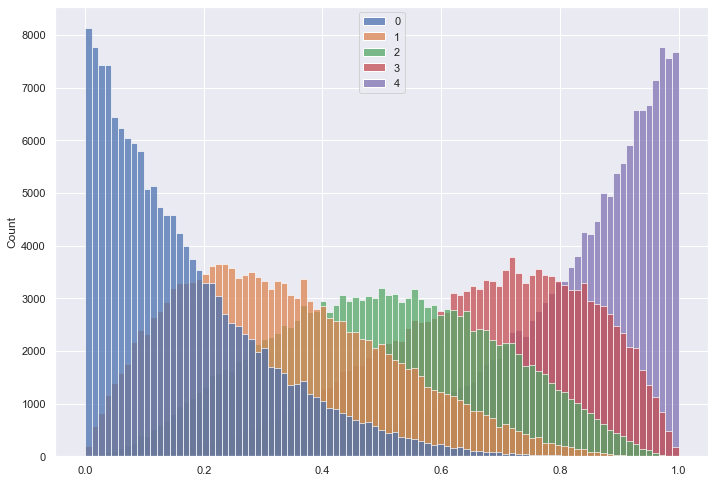

In [3]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(data=df);

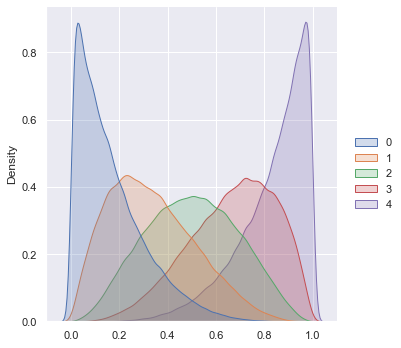

In [4]:
sns.displot(df,kind="kde", fill=True);

Sejam $X_1,X_2,...X_n$ variáveis aleatórias i.i.d, contínuas com função de densidade comum $f$ e função de distribuição $F$. Defina $Y_i$ a i-ésima menor de $ X_1,X_2,...X_n $ . As variáveis aleatórias $ Y_1\leqslant Y_2\leqslant...\leqslant Y_n $ são denominadas as *estatísticas de ordem* associadas a $X_1,X_2,...X_n$ .

A densidade de $Y_i$ é dada por:

$$ f_{Y_i}(x,y) = \frac {n!}{(i-1)!(n-i)} . [F(x)]^{i-1}. [1-F(x)]^{n-i}.f(x)$$

Para o caso de $Y_1$ e $Y_5$

$$ f_{y_1}(x) = n.f(x).[1-F(x)]^{(n-1)}  = 5.1.[1-x]^4 = 5.[1-x]^4 $$

$$ f_{y_5}(x) = n.f(x).[F(x)]^{(n-1)}  = 5.1.x^4 = 5.x^4 $$

No caso integramos para achar a função acumulada de probabilidade:

$$ F_{y_5}(x) = \int f_{y_5}(x) dx = x^5$$

In [6]:
Fy5 = (0.5**5) # P(x5<0.5)
print(f'{Fy5:.3%}')

3.125%


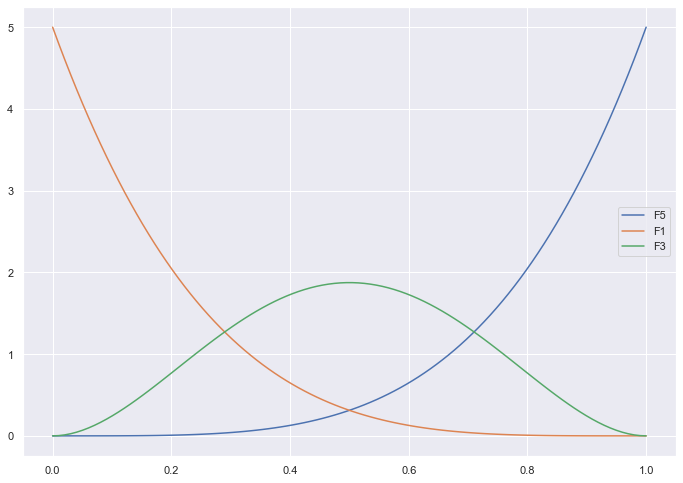

In [7]:
import seaborn as sns
import numpy as np

x = np.linspace(0, 1, 100)

y5 = 5*(x**4)

y3 = 30*(x**2)*((1-x)**2)

y1 = 5*((1-x)**4)

sns.lineplot(x=x, y=y5, label='F5');

sns.lineplot(x=x, y=y1, label='F1');

sns.lineplot(x=x, y=y3, label='F3');

Para $f_3(x) = 30.x^2.(1-x)^2$

A $E(f3(x))$ =  $\int f_3(x).x dx $:

$ E(f3(x)) = \int 30.x^2.(1-x)^2 = 30.(\frac{x^4}{4} - \frac{2x^5}{5} + \frac{x^6}{6} ) = 30.(\frac{1}{4}-\frac{2}{5}+\frac{1}{6}) = 0.5 $